In [22]:
rm(list = ls())

In [23]:
library(tibble)
library(ggplot2)
library(dplyr)
library(ggsignif)

all_data<- read.csv("../result/C_index_result.csv")


color_palette <- c(
  "snp" = "#9EBCDA",
  "drug" = "#EBC595",
  "baseline" = "#D0896E",
  "cnv" = "#FF5733",
  "drug_cnv" = "#FF9E33",
  "drug_snp" = "#A933FF",
  "drug_cnv_snp" = "#FF33A1" 
)





snp_dataframes <- list()
drug_dataframes <- list()
cnv_dataframes <- list()
baseline_dataframes <- list()
drug_cnv_dataframes <- list()
drug_snp_dataframes <- list()
drug_cnv_snp_dataframes <- list() 



snp_dataframes[[1]] <- all_data %>% filter(group == "snp")
drug_dataframes[[1]] <- all_data %>% filter(group == "drug")
cnv_dataframes[[1]] <- all_data %>% filter(group == "cnv")
baseline_dataframes[[1]] <- all_data %>% filter(group == "baseline")
drug_cnv_dataframes[[1]] <- all_data %>% filter(group == "drug_cnv")
drug_snp_dataframes[[1]] <- all_data %>% filter(group == "drug_snp")
drug_cnv_snp_dataframes[[1]] <- all_data %>% filter(group == "drug_cnv_snp")




# Combine dataframes
all_snp_df <- do.call(rbind, snp_dataframes)
all_drug_df <- do.call(rbind, drug_dataframes)
all_baseline_df <- do.call(rbind, baseline_dataframes)
all_cnv_df <- do.call(rbind, cnv_dataframes)
all_drug_cnv_df <- do.call(rbind, drug_cnv_dataframes)
all_drug_snp_df <- do.call(rbind, drug_snp_dataframes)
all_drug_cnv_snp_df <- do.call(rbind, drug_cnv_snp_dataframes)

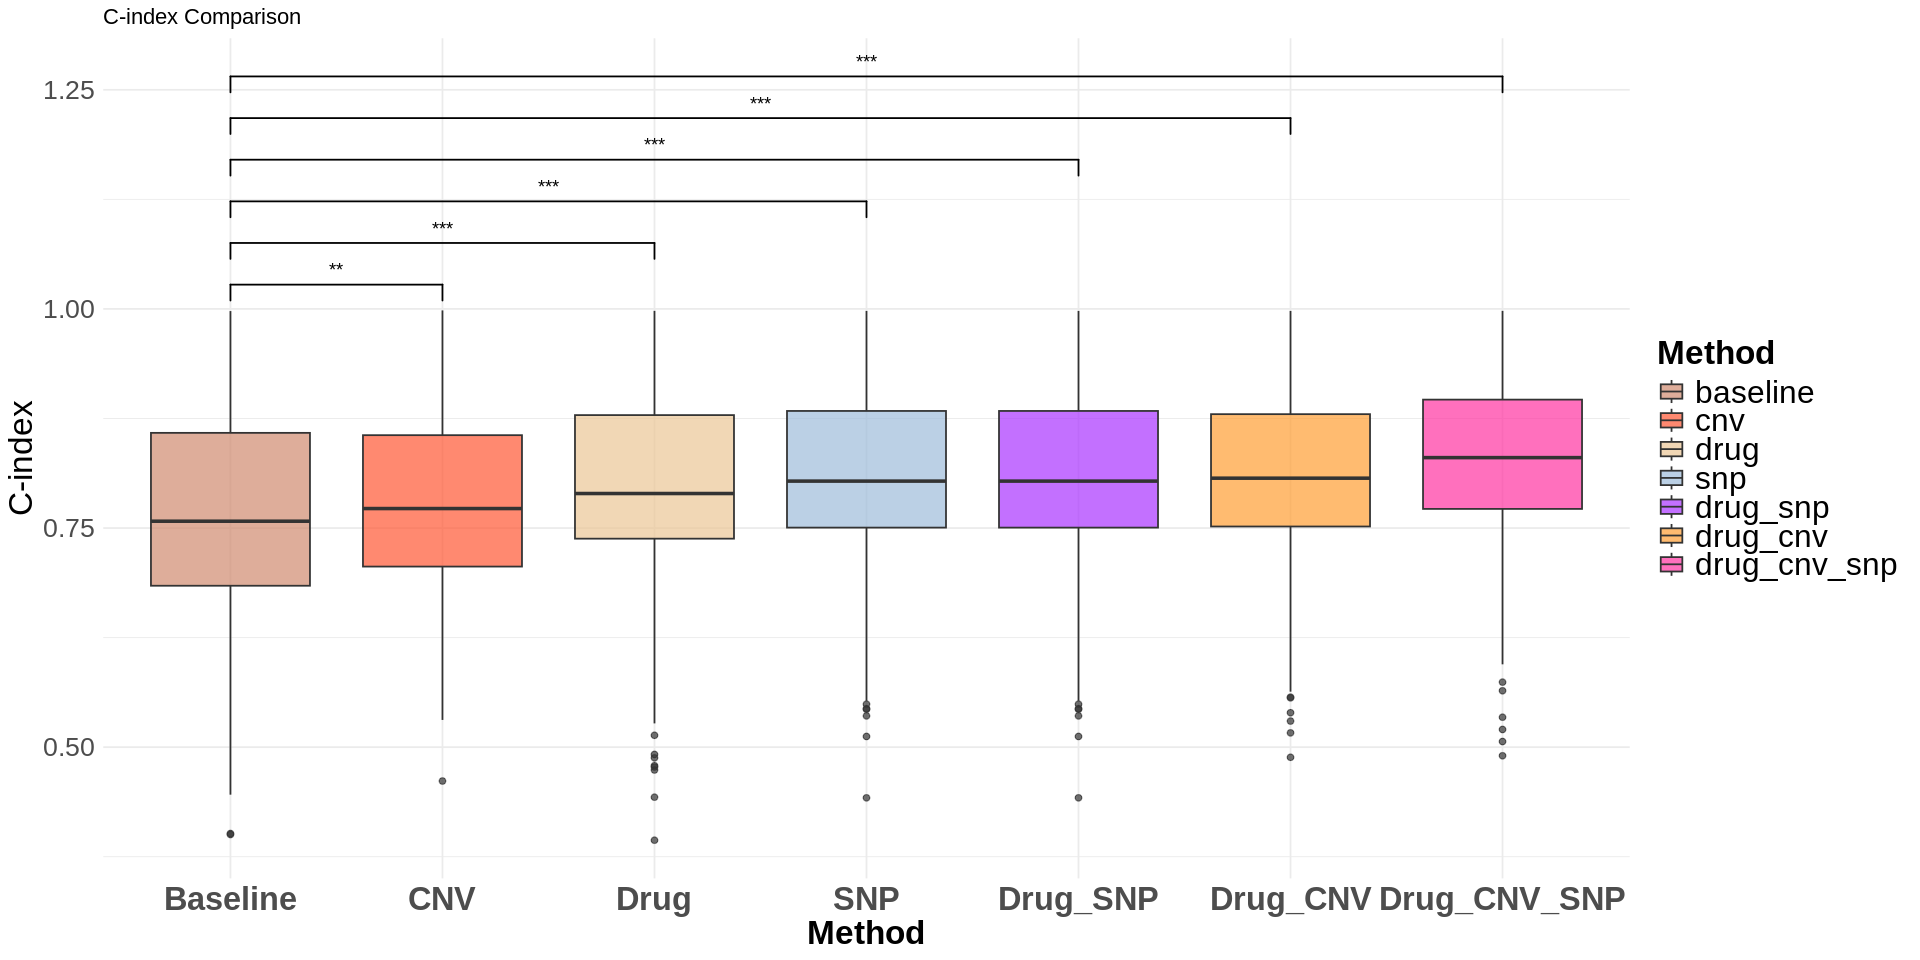

In [32]:
min_rows <- min(length(all_baseline_df$c_index), length(all_snp_df$c_index), 
                length(all_drug_df$c_index), length(all_cnv_df$c_index), 
                length(all_drug_cnv_df$c_index), 
                length(all_drug_snp_df$c_index), length(all_drug_cnv_snp_df$c_index))

all_baseline_c_index <- all_baseline_df$c_index[1:min_rows]
all_snp_c_index <- all_snp_df$c_index[1:min_rows]
all_drug_c_index <- all_drug_df$c_index[1:min_rows]
all_cnv_c_index <- all_cnv_df$c_index[1:min_rows]
all_drug_cnv_c_index <- all_drug_cnv_df$c_index[1:min_rows]
all_drug_snp_c_index <- all_drug_snp_df$c_index[1:min_rows]
all_drug_cnv_snp_c_index <- all_drug_cnv_snp_df$c_index[1:min_rows]

# Combine the filtered c_index values
all_c_index <- c(all_baseline_c_index, all_snp_c_index, all_drug_c_index, 
                 all_cnv_c_index, all_drug_cnv_c_index, 
                 all_drug_snp_c_index, all_drug_cnv_snp_c_index)


method_labels <- rep(c("baseline", "snp", "drug", "cnv", "drug_cnv", 
                       "drug_snp", "drug_cnv_snp"), 
                     each = min_rows)

boxplot_data <- data.frame(Method = factor(method_labels, levels = c("baseline", "snp", "drug", 
                                                                     "cnv", "drug_cnv", 
                                                                     "drug_snp", "drug_cnv_snp")),
                           c_index = all_c_index)

# Calculate median values and order levels
median_values <- tapply(boxplot_data$c_index, boxplot_data$Method, median)
ordered_levels <- c("baseline", names(sort(median_values[-which(names(median_values) == "baseline")])))

boxplot_data$Method <- factor(boxplot_data$Method, levels = ordered_levels)

# Set up comparisons
comparisons <- list(c("baseline", "cnv"), c("baseline", "drug"), c("baseline", "snp"),
                    c("baseline", "drug_snp"), c("baseline", "drug_cnv"), c("baseline", "drug_cnv_snp"))

max_y <- 0.95

boxplot_plot <- ggplot(boxplot_data, aes(x = Method, y = c_index, fill = Method)) +
  geom_boxplot(alpha = 0.7) +
  scale_fill_manual(values = color_palette) +
  theme_minimal() +
  labs(title = "C-index Comparison", x = "Method", y = "C-index") +
  scale_x_discrete(labels = c(
    "baseline" = "Baseline",
    "drug" = "Drug",
    "snp" = "SNP",
    "cnv" = "CNV",
    "drug_cnv" = "Drug_CNV",
    "drug_snp" = "Drug_SNP",
    "drug_cnv_snp" = "Drug_CNV_SNP"
  )) +
  geom_signif(comparisons = comparisons, y_position = seq(max_y * 1.05, max_y * 1.3, length.out = length(comparisons)), 
              map_signif_level = TRUE, test = "wilcox.test")+
  theme(
    axis.text.x = element_text(size = 19.5, face = "bold"),     
    axis.title.x = element_text(size = 20, face = "bold"),    
    axis.title.y = element_text(size = 20),     
    axis.text.y = element_text(size = 16),                     
    legend.text = element_text(size = 19),                     
    legend.title = element_text(size = 20, face = "bold")      
  )



options(
  repr.plot.width = 16,  
  repr.plot.height = 8 
)
boxplot_plot


ggsave(filename = file.path("Fig_2A.png"), plot = boxplot_plot, width = 20, height = 10, dpi = 300, bg = "white")